<a href="https://colab.research.google.com/github/Udit-Tiwari/SENTIMENTAL-ANALYSIS-OF-RESTAURANT-REVIEWS-/blob/main/IBMfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Result/sentimentalreview_IBMpro.tsv', delimiter='\t', quoting=3)

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0,1000):
  review = re.sub(pattern = '[^a-zA-Z]',repl ='  ',string=data['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]
  review =' '.join(review)
  corpus.append(review)

corpus[:1500]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

In [ ]:
print("---- Multinomial Naive Bayes Scores ----")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}%".format(round(score2 * 100, 2)))
print("Recall score is: {}%".format(round(score3 * 100, 2)))

---- Multinomial Naive Bayes Scores ----
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


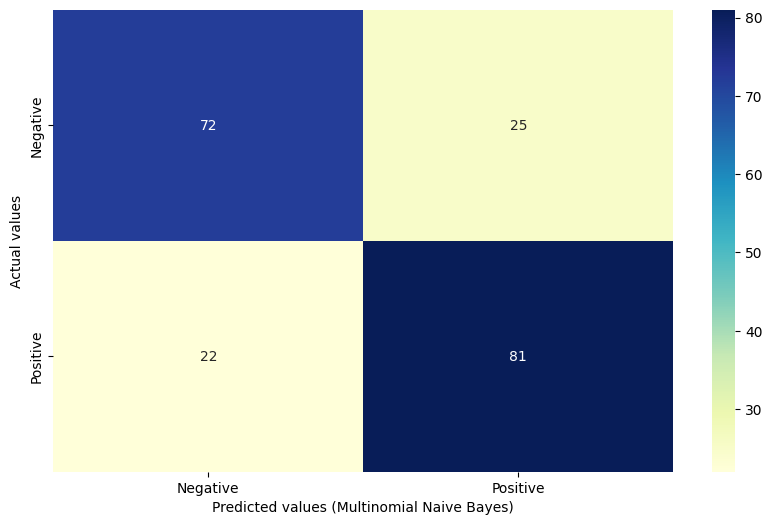

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values (Multinomial Naive Bayes)')
plt.ylabel('Actual values')
plt.show()

In [ ]:
#using svm model
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(data)):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [lemmatizer.lemmatize(word) for word in review_words if word not in set(stopwords.words('english'))]
    review = ' '.join(review_words)
    corpus.append(review)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
adjusted_threshold = 0.4  # Experiment with different values
y_svm_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]
y_svm_pred_adjusted = (y_svm_pred_proba >= adjusted_threshold).astype(int)

In [ ]:
svm_accuracy = accuracy_score(y_test, y_svm_pred_adjusted)
svm_precision = precision_score(y_test, y_svm_pred_adjusted)
svm_recall = recall_score(y_test, y_svm_pred_adjusted)

In [53]:
print("---- Support Vector Machine (SVM) Scores ----")
print("Accuracy score is: {}%".format(round(svm_accuracy * 100, 2)))
print("Precision score is: {}%".format(round(svm_precision * 100, 2)))
print("Recall score is: {}%".format(round(svm_recall * 100, 2)))

---- Support Vector Machine (SVM) Scores ----
Accuracy score is: 77.0%
Precision score is: 77.14%
Recall score is: 78.64%


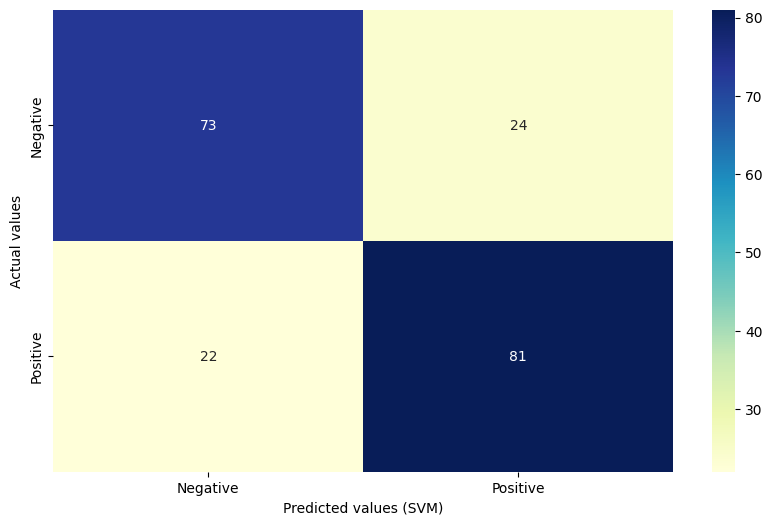

In [54]:
svm_cm = confusion_matrix(y_test, y_svm_pred_adjusted)
plt.figure(figsize=(10, 6))
sns.heatmap(svm_cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values (SVM)')
plt.ylabel('Actual values')
plt.show()

In [55]:
def classify_review(sample_review):
    # Preprocess the review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [lemmatizer.lemmatize(word) for word in sample_review_words if word not in set(stopwords.words('english'))]
    sample_review = ' '.join(sample_review_words)

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Load the dataset (assuming you've already loaded it in your code)
# data = pd.read_csv('/content/drive/MyDrive/Result/sentimentalreview_IBMpro.tsv', delimiter='\t', quoting=3)

# Preprocessing: Lemmatization instead of stemming
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Function to preprocess and classify a review
def classify_review(sample_review):
    # Preprocess the review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [lemmatizer.lemmatize(word) for word in sample_review_words if word not in set(stopwords.words('english'))]
    sample_review = ' '.join(sample_review_words)

    # Vectorize the review using the same TF-IDF vectorizer used in training
    sample_review_vectorized = tfidf_vectorizer.transform([sample_review]).toarray()

    # Predict the sentiment using the SVM model
    sample_sentiment_prediction = svm_classifier.predict(sample_review_vectorized)

    # Interpret the prediction
    if sample_sentiment_prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Load your trained TF-IDF vectorizer and SVM model
# tfidf_vectorizer = ... # Load your trained TF-IDF vectorizer
# svm_classifier = ...   # Load your trained SVM classifier

# Example usage:
sample_review = 'The food is really bad.'  # Replace with the review you want to check
classification = classify_review(sample_review)

if classification == "Positive":
    print("The review is classified as Positive.")
else:
    print("The review is classified as Negative.")


The review is classified as Negative.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
def classify_review(sample_review):
    # Preprocess the review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [lemmatizer.lemmatize(word) for word in sample_review_words if word not in set(stopwords.words('english'))]
    sample_review = ' '.join(sample_review_words)


    sample_review_vectorized = tfidf_vectorizer.transform([sample_review]).toarray()
    sample_sentiment_prediction = svm_classifier.predict(sample_review_vectorized)

    if sample_sentiment_prediction == 1:
        return "Positive"
    else:
        return "Negative"

sample_review = 'The food is really bad.'
prediction = classify_review(sample_review)

if prediction == "Positive":
  print("This is a positive review")
else:
  print("This is a negative review")

This is a negative review


In [57]:
sample_review = 'The food is really amazing '
prediction = classify_review(sample_review)
if prediction == "Positive":
  print("This is a positive review")
else:
  print("This is a negative review")



This is a positive review
